<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Extension/blob/main/Adult_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Extension/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [4]:
# data_orig = pd.read_csv("Credit_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv("Credit_SRS_Fine_Tuning.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv("Credit_SRSwR_Fine_Tuning.csv", sep=",", header=0)
# data_Sy = pd.read_csv("Credit_Sy_Fine_Tuning.csv", sep=",", header=0)
# data_Sym = pd.read_csv("Credit_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv("Credit_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv("Credit_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data+"Adult_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data+"Adult_SRS_Fine_Tuning.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data+"Adult_SRSwR_Fine_Tuning.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data+"Adult_Sy_Fine_Tuning.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data+"Adult_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data+"Adult_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data+"Adult_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)



# data_orig

Original (imbalanced) data performance:

In [5]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.003582,0.889855
1,1,0.009670,0.837681
2,2,0.007163,0.846377
3,3,0.003940,0.892754
4,4,0.009670,0.840580
5,5,0.004298,0.872464
6,6,0.002865,0.881159
7,7,0.007521,0.846377
8,8,0.003223,0.881159
9,9,0.003582,0.889855


Error type: FPR
Mean: 0.004899713467048652
Variance: 6.856282303234973e-06
Variance of estimate: 1.3712564606469944e-07
Standard error: 0.00037030480156851795
95% Confidence Interval:  [ 0.004173916055974357 ,  0.005625510878122948 ]
-----------------------------
Error type: FNR
Mean: 0.876231884057971
Variance: 0.000615288333354766
Variance of estimate: 1.230576666709532e-05
Standard error: 0.0035079576204816556
95% Confidence Interval:  [ 0.869356287121827 ,  0.8831074809941151 ]
-----------------------------


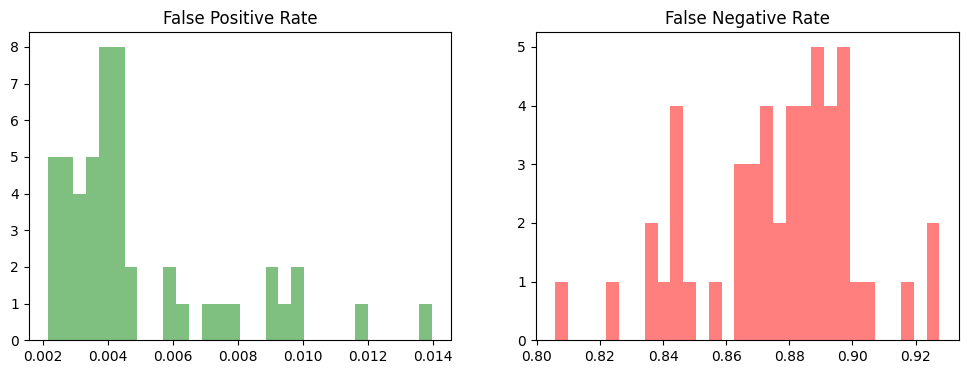

In [6]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.18199856733524353
Variance: 0.00041922895852703206
Variance of estimate: 8.384579170540641e-06
Standard error: 0.0028956137813148774
95% Confidence Interval:  [ 0.17632316432386635 ,  0.1876739703466207 ]
-----------------------------
Error type: FNR
Mean: 0.44713043478260867
Variance: 0.0011713574150517179
Variance of estimate: 2.3427148301034357e-05
Standard error: 0.004840159945811126
95% Confidence Interval:  [ 0.43764372128881884 ,  0.4566171482763985 ]
-----------------------------


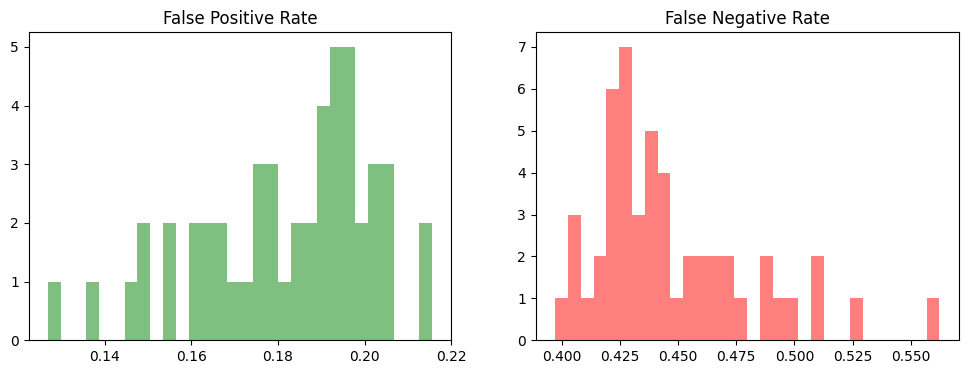

In [7]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.15052292263610312
Variance: 0.00019107787099700428
Variance of estimate: 3.821557419940086e-06
Standard error: 0.001954880410649226
95% Confidence Interval:  [ 0.14669135703123062 ,  0.1543544882409756 ]
-----------------------------
Error type: FNR
Mean: 0.3351304347826087
Variance: 0.0010729661492826488
Variance of estimate: 2.1459322985652976e-05
Standard error: 0.004632420855843408
95% Confidence Interval:  [ 0.32605088990515557 ,  0.3442099796600618 ]
-----------------------------


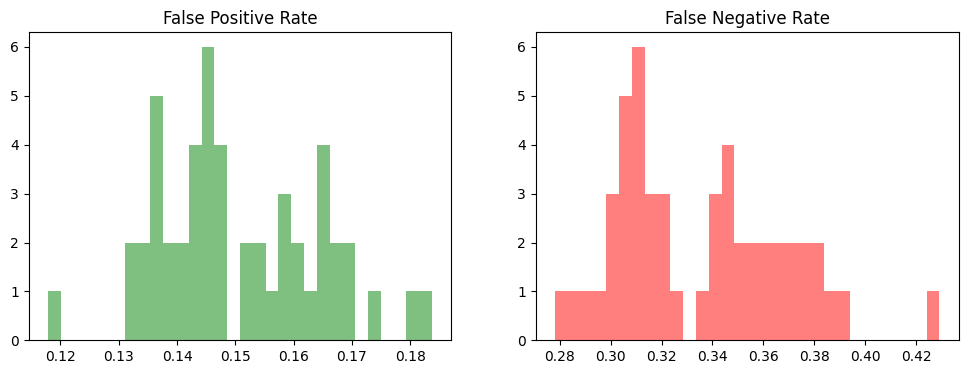

In [8]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.10588108882521485
Variance: 0.0006230412492005609
Variance of estimate: 1.2460824984011217e-05
Standard error: 0.0035299893744898466
95% Confidence Interval:  [ 0.09896230965121475 ,  0.11279986799921496 ]
-----------------------------
Error type: FNR
Mean: 0.5261449275362319
Variance: 0.004020503324203028
Variance of estimate: 8.041006648406056e-05
Standard error: 0.008967166023000833
95% Confidence Interval:  [ 0.5085692821311503 ,  0.5437205729413135 ]
-----------------------------


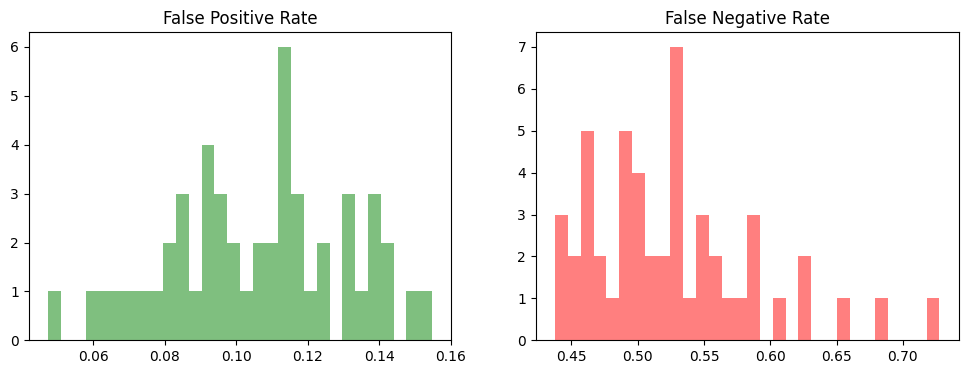

In [9]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.13141833810888248
Variance: 0.0007553295782397824
Variance of estimate: 1.510659156479565e-05
Standard error: 0.0038867198979082155
95% Confidence Interval:  [ 0.12380036710898237 ,  0.1390363091087826 ]
-----------------------------
Error type: FNR
Mean: 0.3700869565217391
Variance: 0.0018066655521691982
Variance of estimate: 3.613331104338396e-05
Standard error: 0.006011098987987468
95% Confidence Interval:  [ 0.3583052025052837 ,  0.38186871053819454 ]
-----------------------------


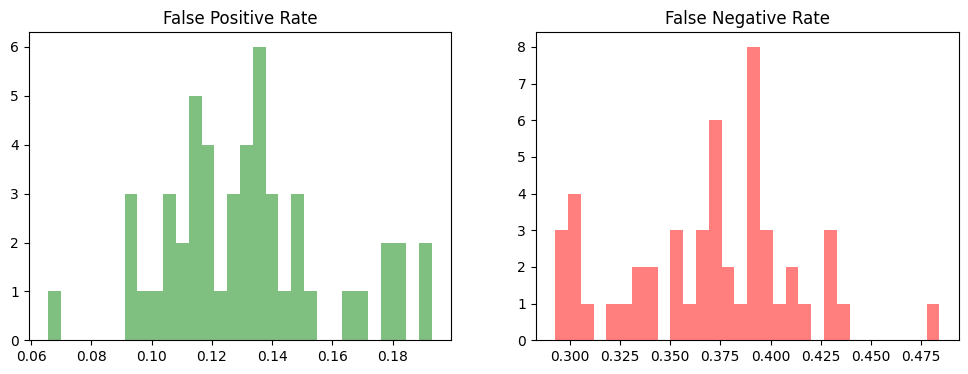

In [10]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.1400644699140401
Variance: 0.0004311954079831453
Variance of estimate: 8.623908159662906e-06
Standard error: 0.002936649137990936
95% Confidence Interval:  [ 0.13430863760357786 ,  0.14582030222450232 ]
-----------------------------
Error type: FNR
Mean: 0.30428985507246376
Variance: 0.0012902417173548681
Variance of estimate: 2.580483434709736e-05
Standard error: 0.005079845897967512
95% Confidence Interval:  [ 0.29433335711244746 ,  0.31424635303248005 ]
-----------------------------


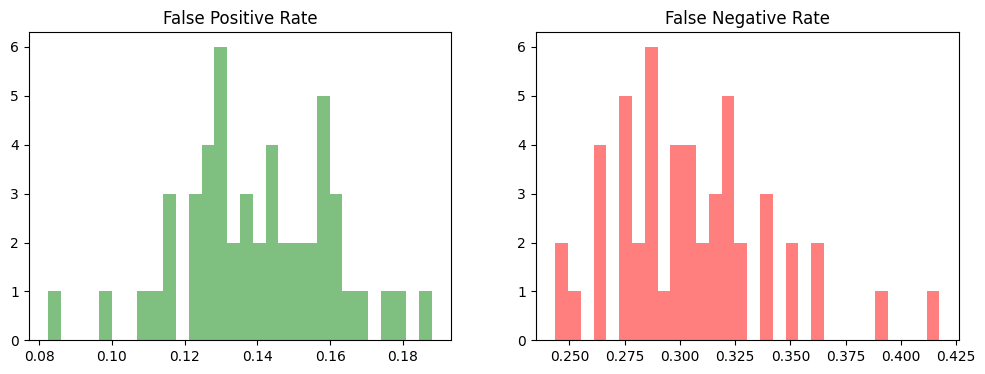

In [11]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.13611031518624642
Variance: 0.0010145275125920516
Variance of estimate: 2.029055025184103e-05
Standard error: 0.004504503330206453
95% Confidence Interval:  [ 0.12728148865904176 ,  0.14493914171345107 ]
-----------------------------
Error type: FNR
Mean: 0.35872463768115936
Variance: 0.002190779676710004
Variance of estimate: 4.381559353420008e-05
Standard error: 0.0066193348256603605
95% Confidence Interval:  [ 0.34575074142286505 ,  0.3716985339394537 ]
-----------------------------


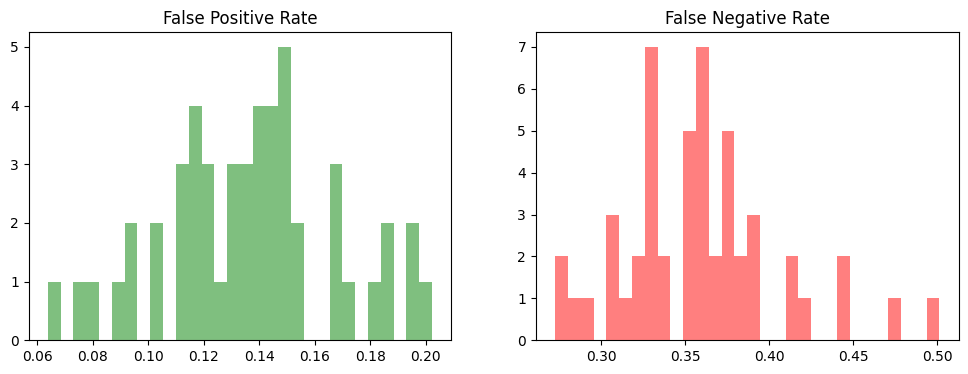

In [12]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [13]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

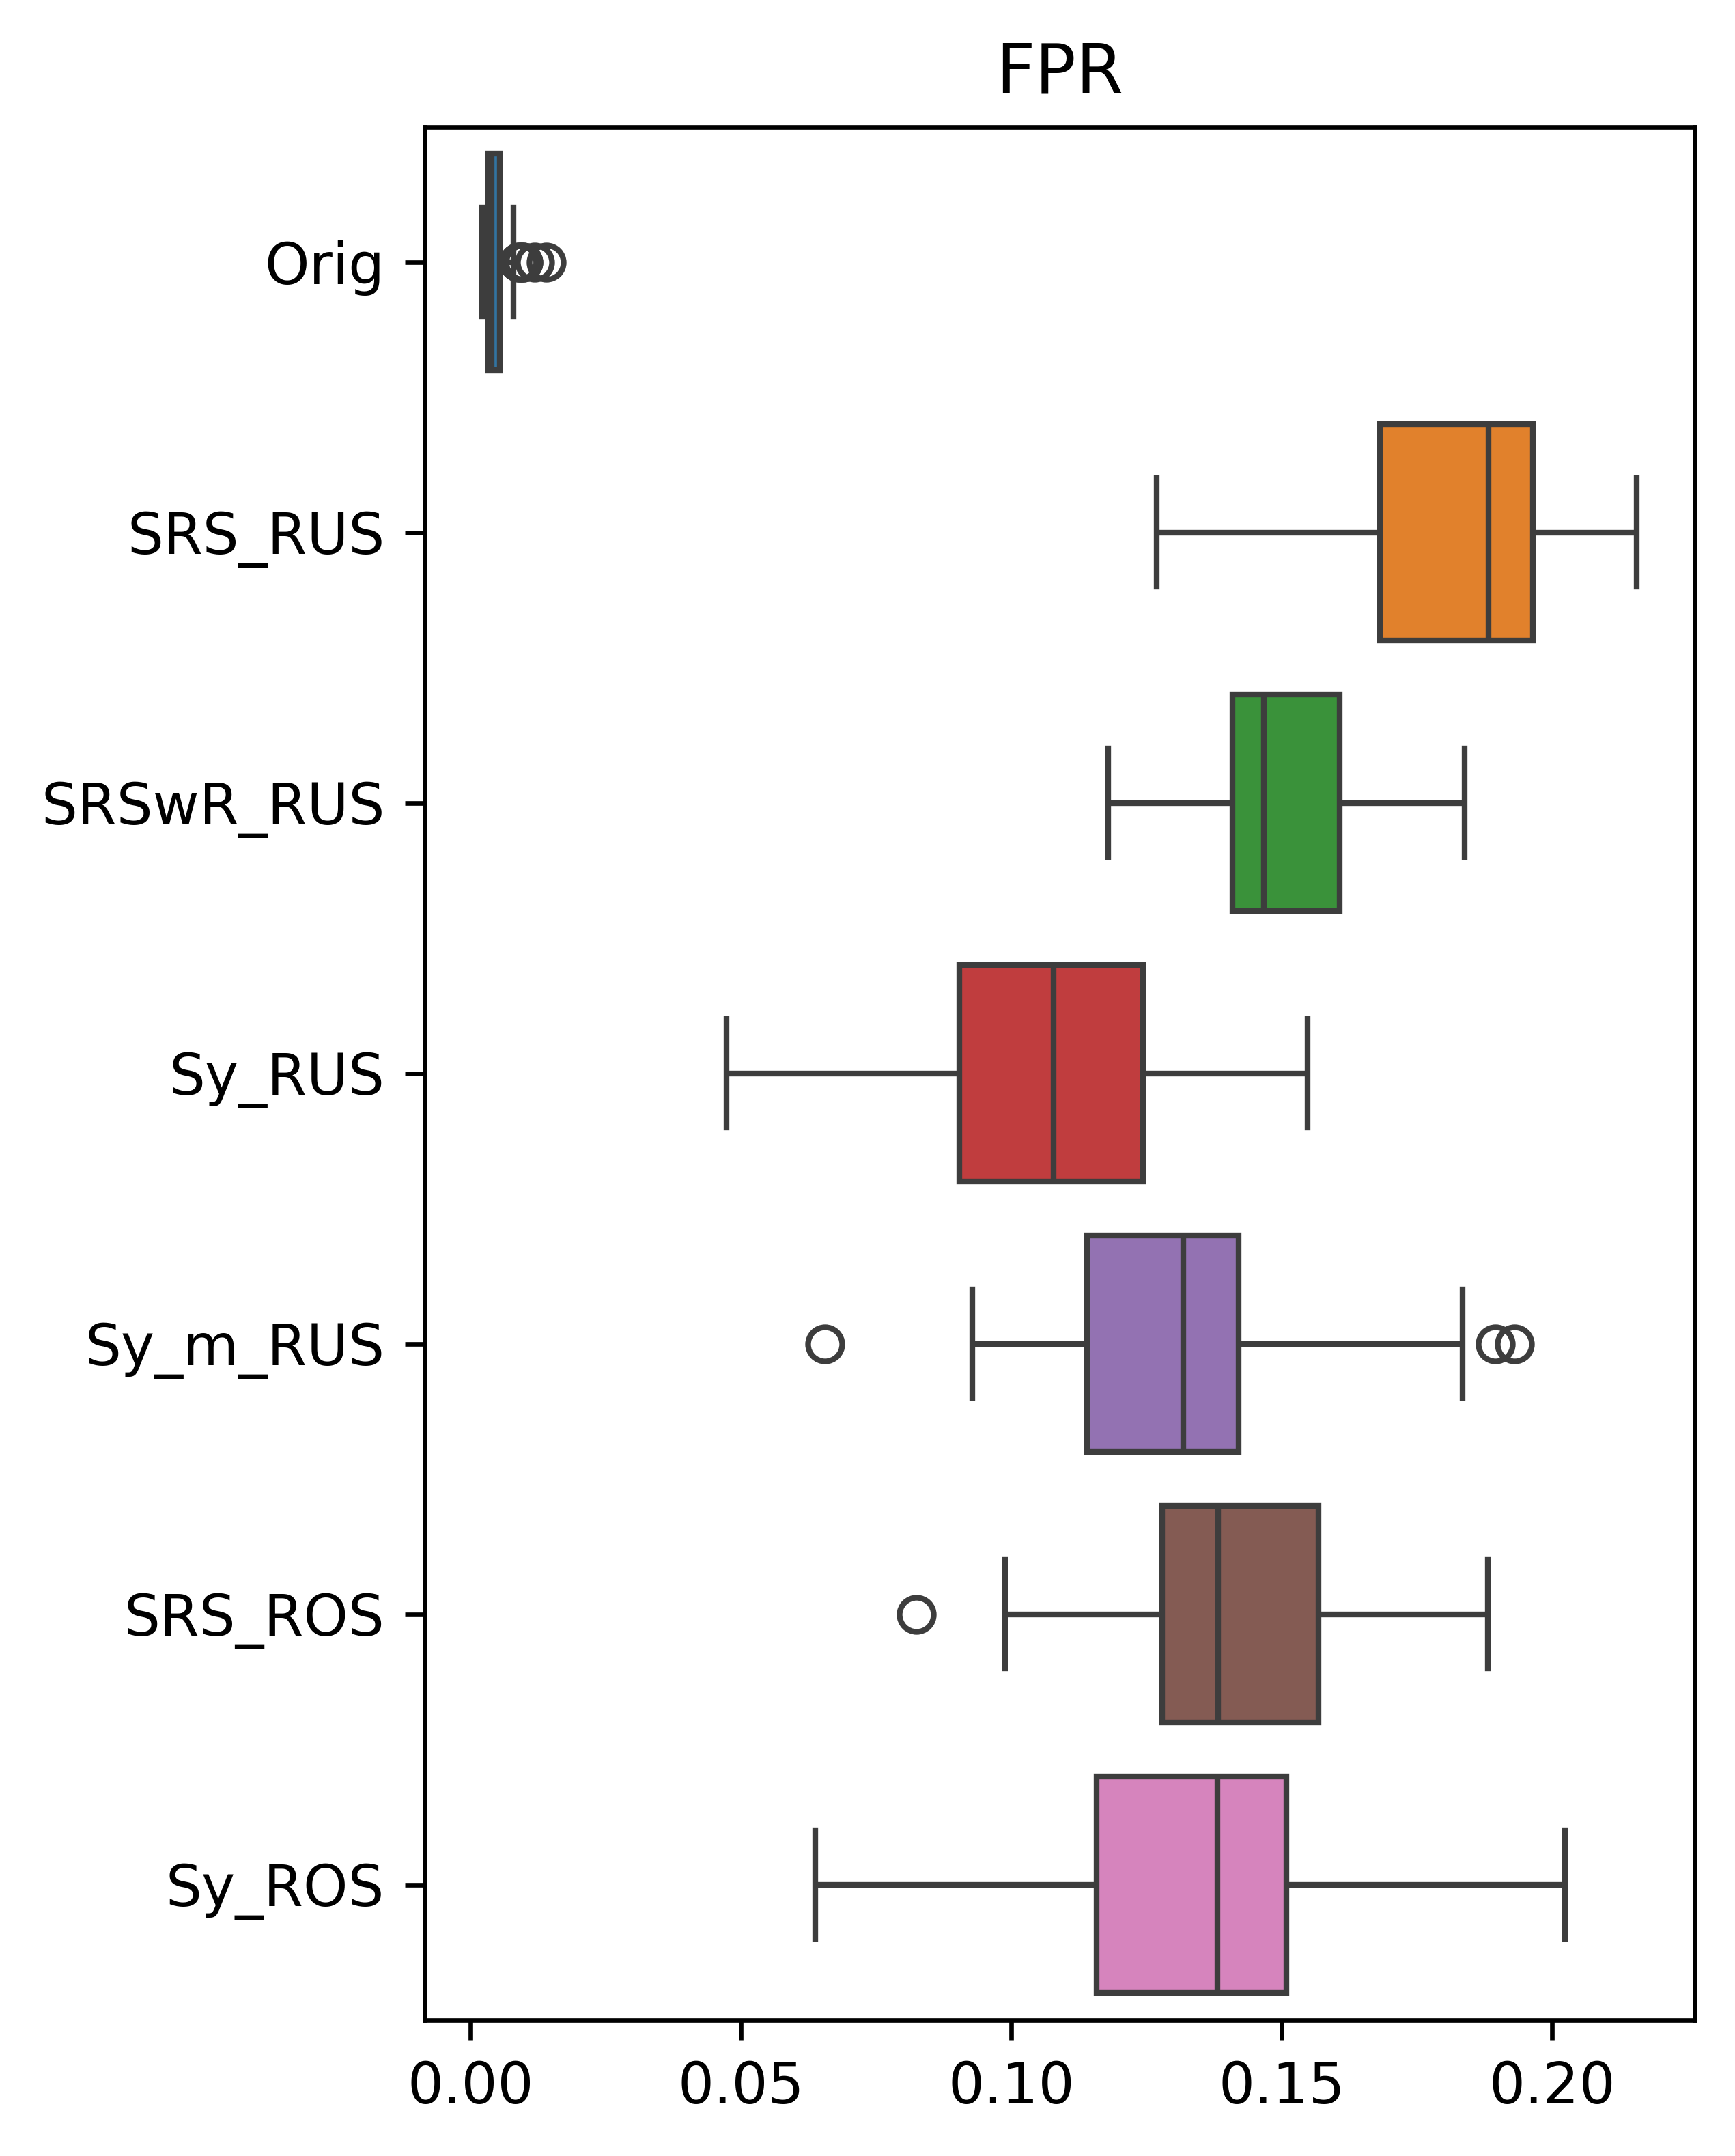

In [14]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [15]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

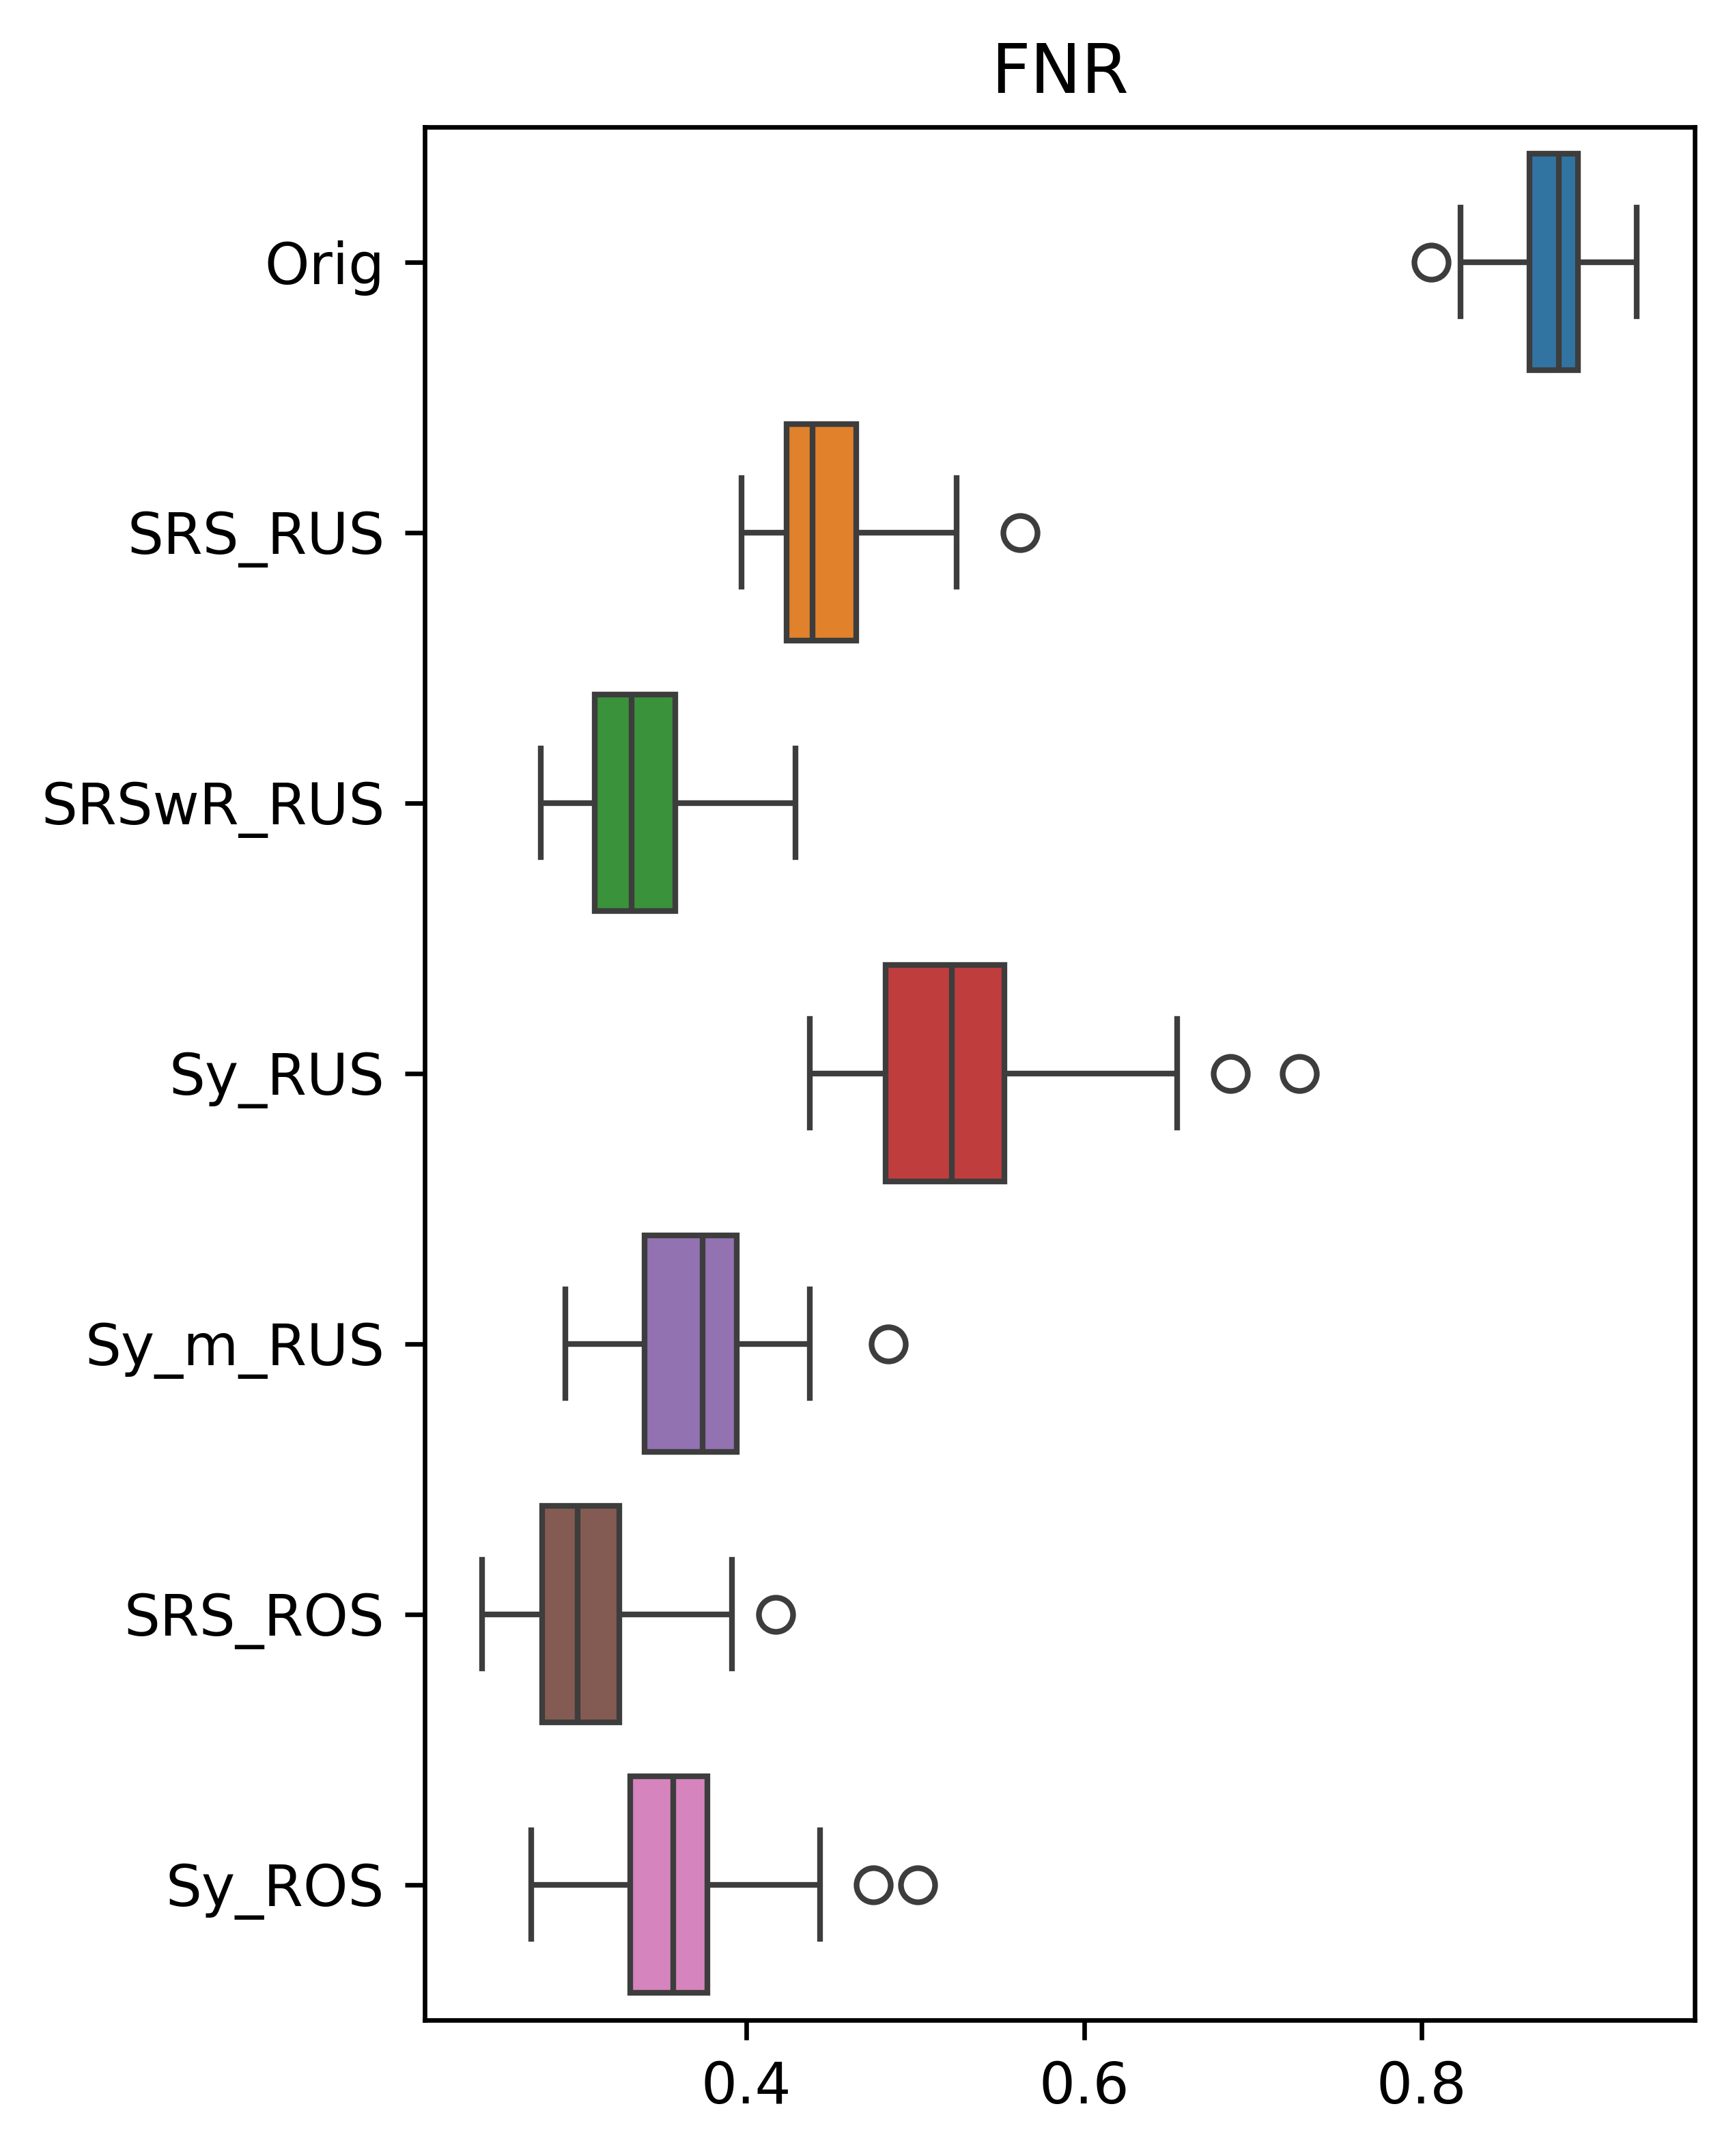

In [16]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [17]:
# data_orig = pd.read_csv(path_to_data + "Imbalanced_Extended.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data + "SRS_RUS_Extended.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data + "SRSwR_RUS_Extended.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data + "Sy_RUS_Extended.csv", sep=",", header=0)
# data_Sy2 = pd.read_csv(path_to_data + "Sy2_RUS_Extended.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data + "SRS_ROS_Extended.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data + "Sy_ROS_Extended.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data+"Adult_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data+"Adult_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data+"Adult_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data+"Adult_Sy_RUS.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data+"Adult_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data+"Adult_SRS_ROS.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data+"Adult_Sy_ROS.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,18.303071,0.124892,0.506336,0.493664,0.875108,1.793025
1,1,16.633857,0.223114,0.635945,0.364055,0.776886,1.199840
2,2,17.355280,0.032765,0.392857,0.607143,0.967235,1.715382
3,3,18.062277,0.062303,0.338710,0.661290,0.937697,1.207519
4,4,15.994438,0.054130,0.516129,0.483871,0.945870,1.779479
5,5,15.906994,0.139590,0.431452,0.568548,0.860410,1.184487
6,6,16.553436,0.010683,0.264977,0.735023,0.989317,1.822441
7,7,15.896399,0.005951,0.152650,0.847350,0.994049,1.195193
8,8,16.689432,0.051118,0.508641,0.491359,0.948882,1.687547
9,9,18.979327,0.002294,0.168203,0.831797,0.997706,1.685237


Original (imbalanced) dataset:

In [18]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 50
SRSwR RUS 50
Sy RUS 50
Sym RUS 50
SRS ROS 50
Sy ROS 50


In [19]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.026780900487525044
Variance: 0.002291315120351748
Variance of estimate: 4.582630240703496e-05
Standard error: 0.006769512715626949
95% Confidence Interval:  [ 0.013512655564896224 ,  0.040049145410153864 ]
-----------------------------
Error type: FNR
Mean: 0.7438824884792626
Variance: 0.02575224046540615
Variance of estimate: 0.000515044809308123
Standard error: 0.022694598681362994
95% Confidence Interval:  [ 0.6994010750637911 ,  0.7883639018947342 ]
-----------------------------
Error type: Source time
Mean: 31.093334453439958
Variance: 28.537780406576783
Variance of estimate: 0.5707556081315357
Standard error: 0.7554836915060018
95% Confidence Interval:  [ 29.612586418088195 ,  32.574082488791724 ]
-----------------------------


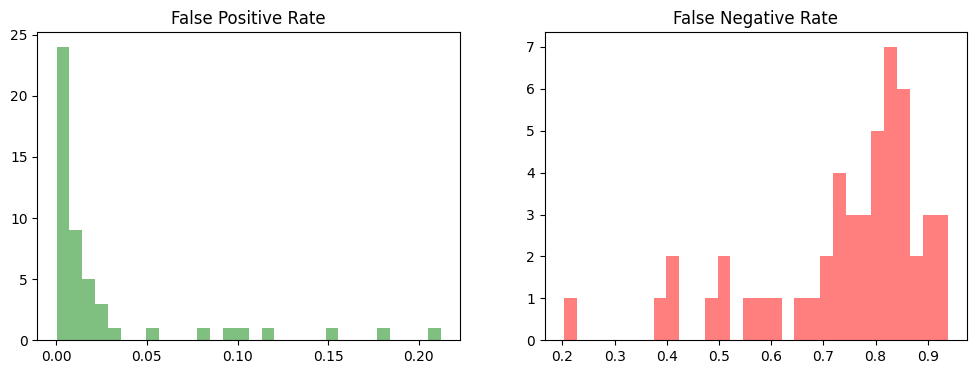

In [20]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.06085173501577283
Variance: 0.005682615652569074
Variance of estimate: 0.00011365231305138148
Standard error: 0.01066078388540831
95% Confidence Interval:  [ 0.039956598600372546 ,  0.08174687143117312 ]
-----------------------------
Error type: FNR
Mean: 0.6312672811059908
Variance: 0.04133593583752174
Variance of estimate: 0.0008267187167504348
Standard error: 0.02875271668469668
95% Confidence Interval:  [ 0.5749119564039854 ,  0.6876226058079963 ]
-----------------------------
Error type: Source time
Mean: 21.587082126900096
Variance: 12.359648989508663
Variance of estimate: 0.24719297979017327
Standard error: 0.49718505587977324
95% Confidence Interval:  [ 20.61259941737574 ,  22.561564836424452 ]
-----------------------------


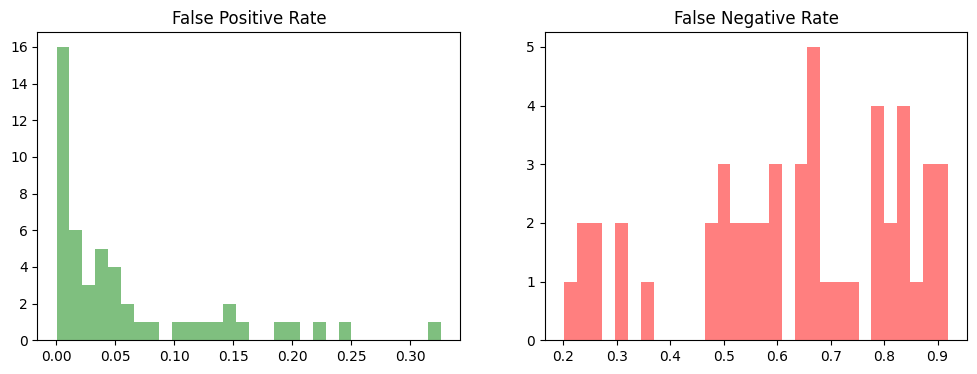

In [21]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.0682090622311442
Variance: 0.01420386824241569
Variance of estimate: 0.0002840773648483138
Standard error: 0.016854594769626287
95% Confidence Interval:  [ 0.03517405648267668 ,  0.10124406797961172 ]
-----------------------------
Error type: FNR
Mean: 0.620679723502304
Variance: 0.048159892540655766
Variance of estimate: 0.0009631978508131153
Standard error: 0.0310354289613196
95% Confidence Interval:  [ 0.5598502827381177 ,  0.6815091642664904 ]
-----------------------------
Error type: Source time
Mean: 21.87745671976003
Variance: 14.527228890831026
Variance of estimate: 0.2905445778166205
Standard error: 0.5390218713713021
95% Confidence Interval:  [ 20.820973851872278 ,  22.93393958764778 ]
-----------------------------


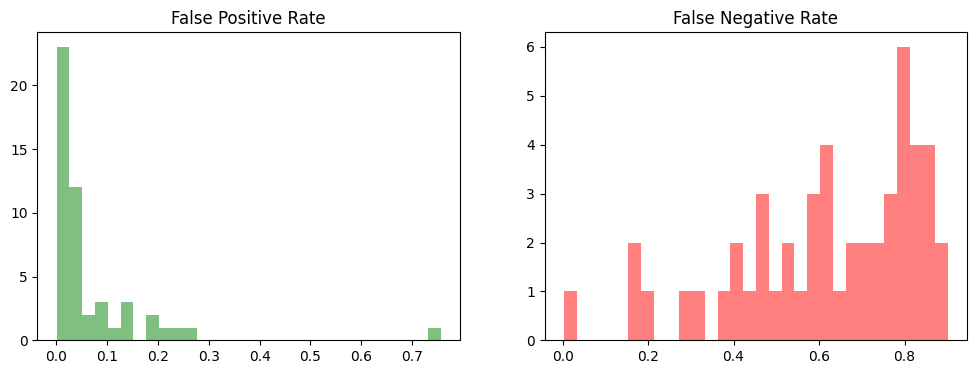

In [22]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.05363349584169769
Variance: 0.008593721943414031
Variance of estimate: 0.0001718744388682806
Standard error: 0.013110089201385344
95% Confidence Interval:  [ 0.027937721006982413 ,  0.07932927067641296 ]
-----------------------------
Error type: FNR
Mean: 0.6798271889400922
Variance: 0.043680294961429965
Variance of estimate: 0.0008736058992285993
Standard error: 0.029556824917920384
95% Confidence Interval:  [ 0.6218958121009682 ,  0.7377585657792162 ]
-----------------------------
Error type: Source time
Mean: 22.048286371640042
Variance: 12.795174029061046
Variance of estimate: 0.2559034805812209
Standard error: 0.5058690350092807
95% Confidence Interval:  [ 21.056783063021854 ,  23.03978968025823 ]
-----------------------------


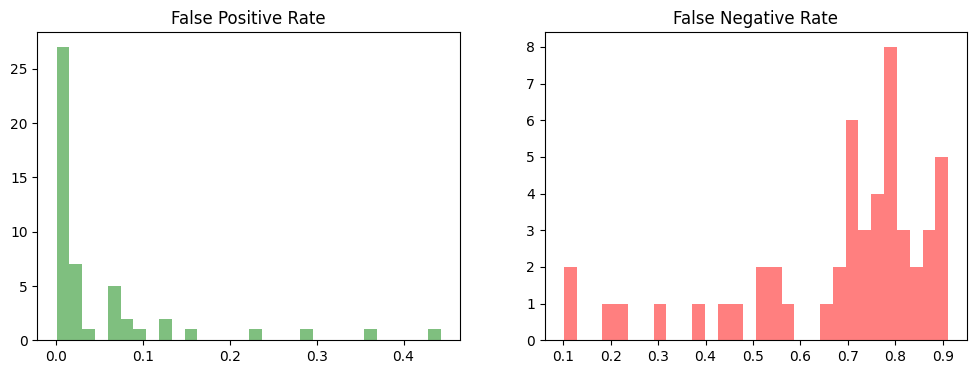

In [23]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [24]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,15.716550,0.004373,0.995627,0.820853,0.179147,1.162152
1,1,16.782630,0.006883,0.993117,0.854839,0.145161,1.812456
2,2,17.794265,0.001075,0.998925,0.904378,0.095622,1.299881
3,3,15.260581,0.067752,0.932248,0.482719,0.517281,1.780965
4,4,17.468869,0.084600,0.915400,0.509217,0.490783,1.196778
5,5,16.248527,0.035059,0.964941,0.686060,0.313940,1.188981
6,6,17.170788,0.156653,0.843347,0.297235,0.702765,4.681395
7,7,19.379553,0.027603,0.972397,0.748272,0.251728,1.266396
8,8,19.884429,0.039647,0.960353,0.612327,0.387673,1.888537
9,9,20.083858,0.079796,0.920204,0.563364,0.436636,1.267837


Error type: FPR
Mean: 0.08621451104100944
Variance: 0.018378307937232975
Variance of estimate: 0.0003675661587446595
Standard error: 0.019172014989162184
95% Confidence Interval:  [ 0.04863736166225156 ,  0.12379166041976732 ]
-----------------------------
Error type: FNR
Mean: 0.5893663594470047
Variance: 0.05656732965171033
Variance of estimate: 0.0011313465930342067
Standard error: 0.03363549602777112
95% Confidence Interval:  [ 0.5234407872325733 ,  0.6552919316614361 ]
-----------------------------
Error type: Source time
Mean: 22.215009478079992
Variance: 12.208017272592233
Variance of estimate: 0.24416034545184467
Standard error: 0.49412583969252677
95% Confidence Interval:  [ 21.24652283228264 ,  23.183496123877344 ]
-----------------------------


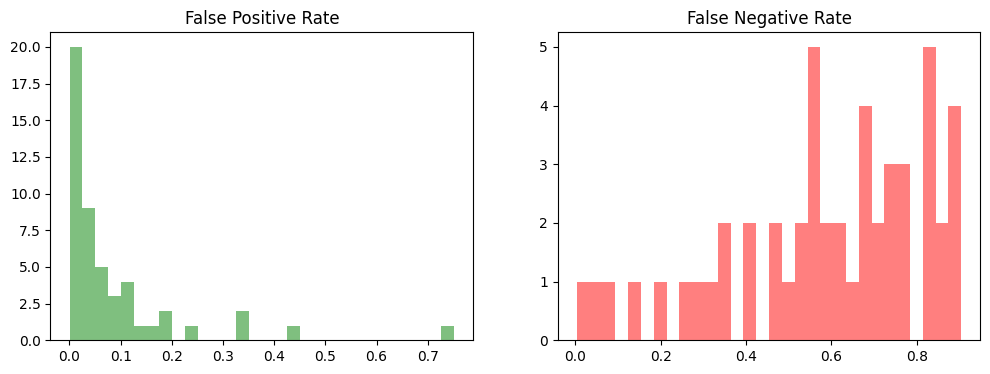

In [25]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.06221106968741033
Variance: 0.006316933613419383
Variance of estimate: 0.00012633867226838767
Standard error: 0.011240047698670486
95% Confidence Interval:  [ 0.04018057619801618 ,  0.08424156317680448 ]
-----------------------------
Error type: FNR
Mean: 0.616152073732719
Variance: 0.040965817659221956
Variance of estimate: 0.0008193163531844391
Standard error: 0.028623702646311134
95% Confidence Interval:  [ 0.5600496165459491 ,  0.6722545309194888 ]
-----------------------------
Error type: Source time
Mean: 44.06965598358001
Variance: 33.31142757755229
Variance of estimate: 0.6662285515510458
Standard error: 0.816228247214617
95% Confidence Interval:  [ 42.46984861903936 ,  45.669463348120665 ]
-----------------------------


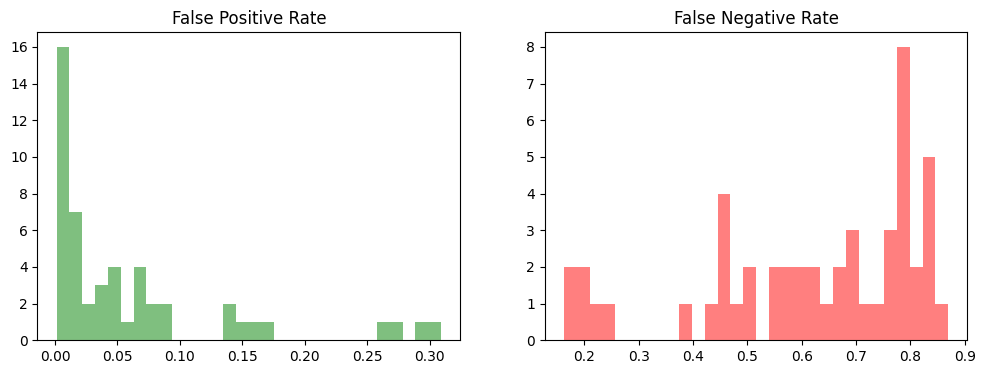

In [26]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [27]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,36.675036,0.023301,0.976699,0.740783,0.259217,1.671912
1,1,35.367708,0.254373,0.745627,0.115783,0.884217,1.161786
2,2,47.703464,0.025738,0.974262,0.659562,0.340438,1.237285
3,3,36.282060,0.016777,0.983223,0.657834,0.342166,1.228638
4,4,39.698375,0.004373,0.995627,0.833525,0.166475,1.247540
5,5,43.878127,0.077574,0.922426,0.580645,0.419355,1.245740
6,6,38.376105,0.095569,0.904431,0.492512,0.507488,1.680118
7,7,43.881735,0.054847,0.945153,0.611175,0.388825,1.250069
8,8,44.255389,0.341124,0.658876,0.133641,0.866359,1.720167
9,9,48.597630,0.039360,0.960640,0.578917,0.421083,1.590261


Error type: FPR
Mean: 0.055521938629194106
Variance: 0.006497764867645081
Variance of estimate: 0.00012995529735290162
Standard error: 0.011399793741682417
95% Confidence Interval:  [ 0.033178342895496565 ,  0.07786553436289165 ]
-----------------------------
Error type: FNR
Mean: 0.6370506912442395
Variance: 0.04131728899378988
Variance of estimate: 0.0008263457798757975
Standard error: 0.028746230707273564
95% Confidence Interval:  [ 0.5807080790579834 ,  0.6933933034304957 ]
-----------------------------
Error type: Source time
Mean: 44.53258927682015
Variance: 15.120279979850865
Variance of estimate: 0.3024055995970173
Standard error: 0.5499141747554952
95% Confidence Interval:  [ 43.45475749429938 ,  45.610421059340915 ]
-----------------------------


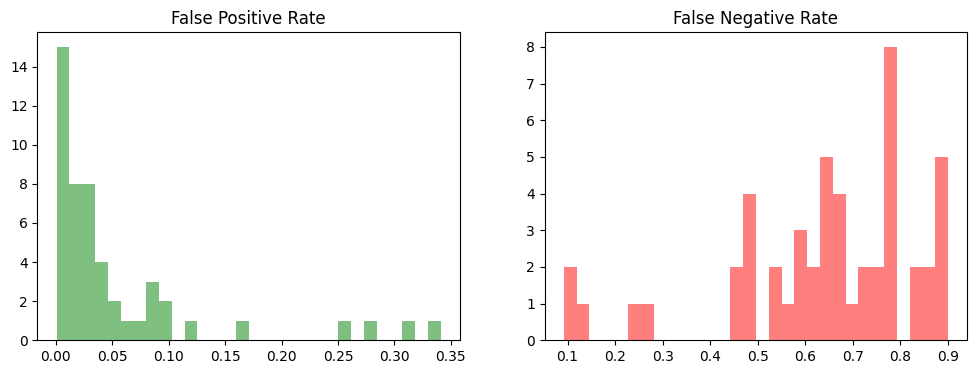

In [28]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [29]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

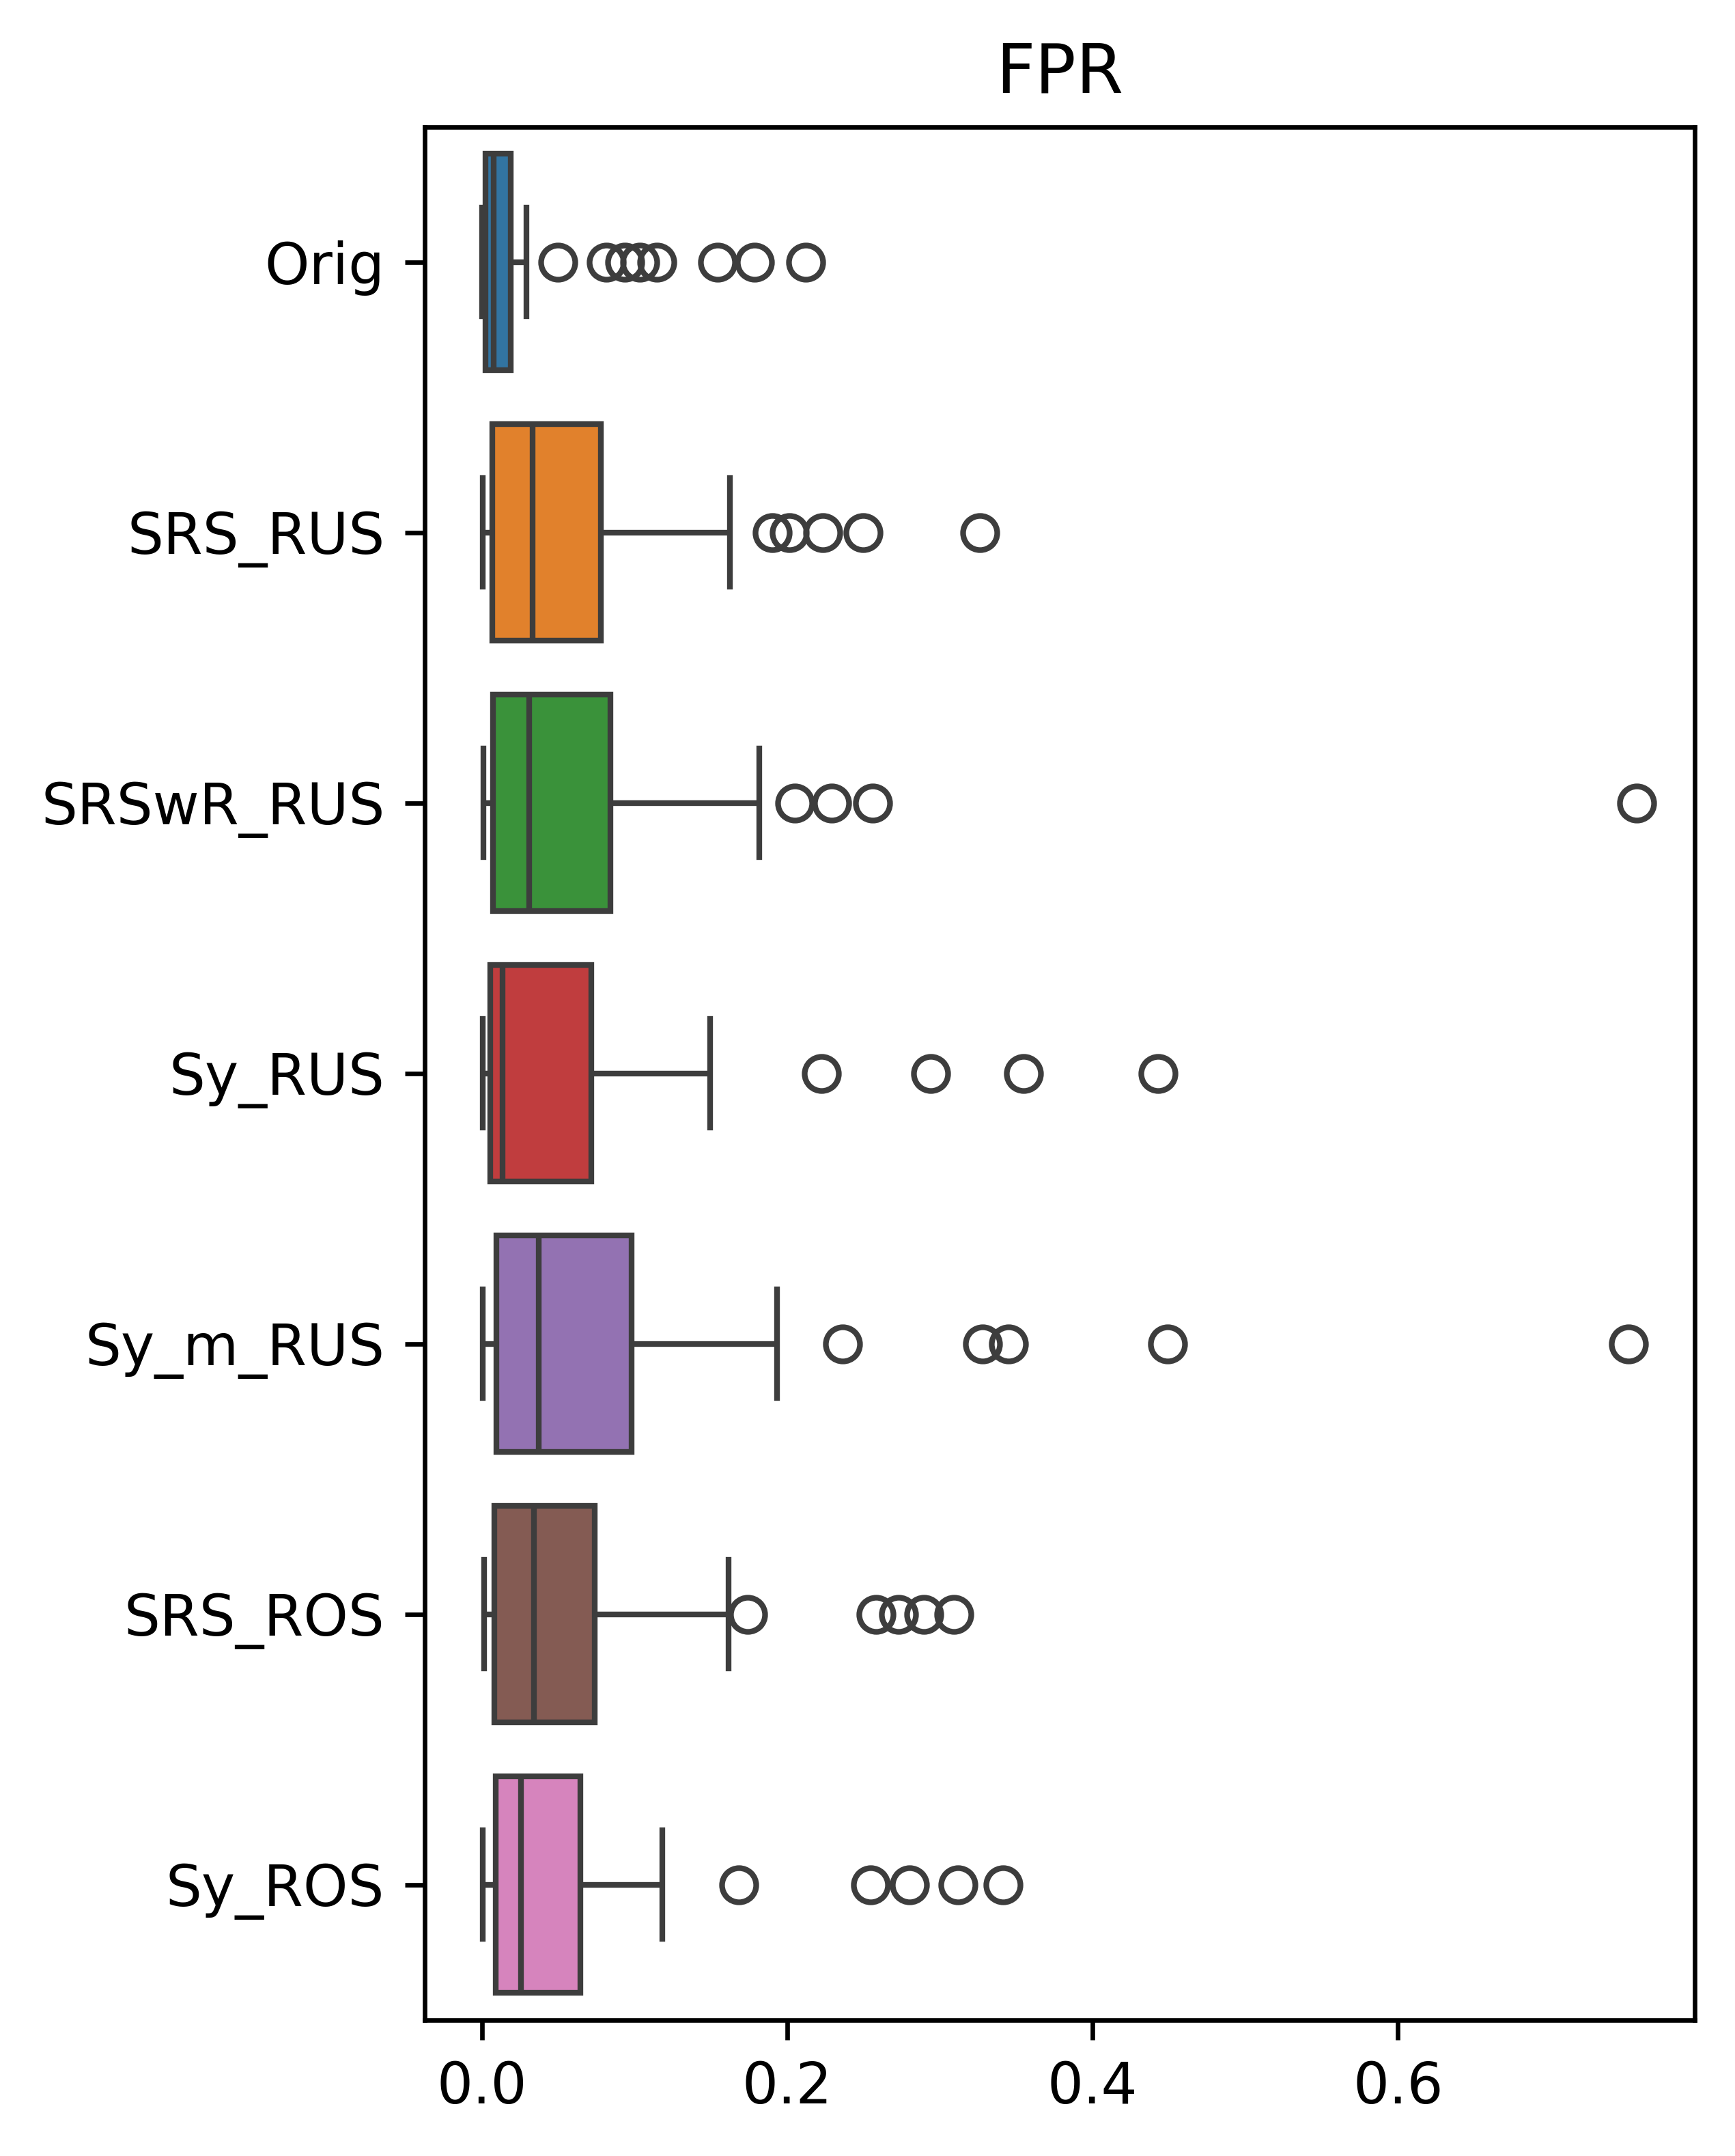

In [30]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [31]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

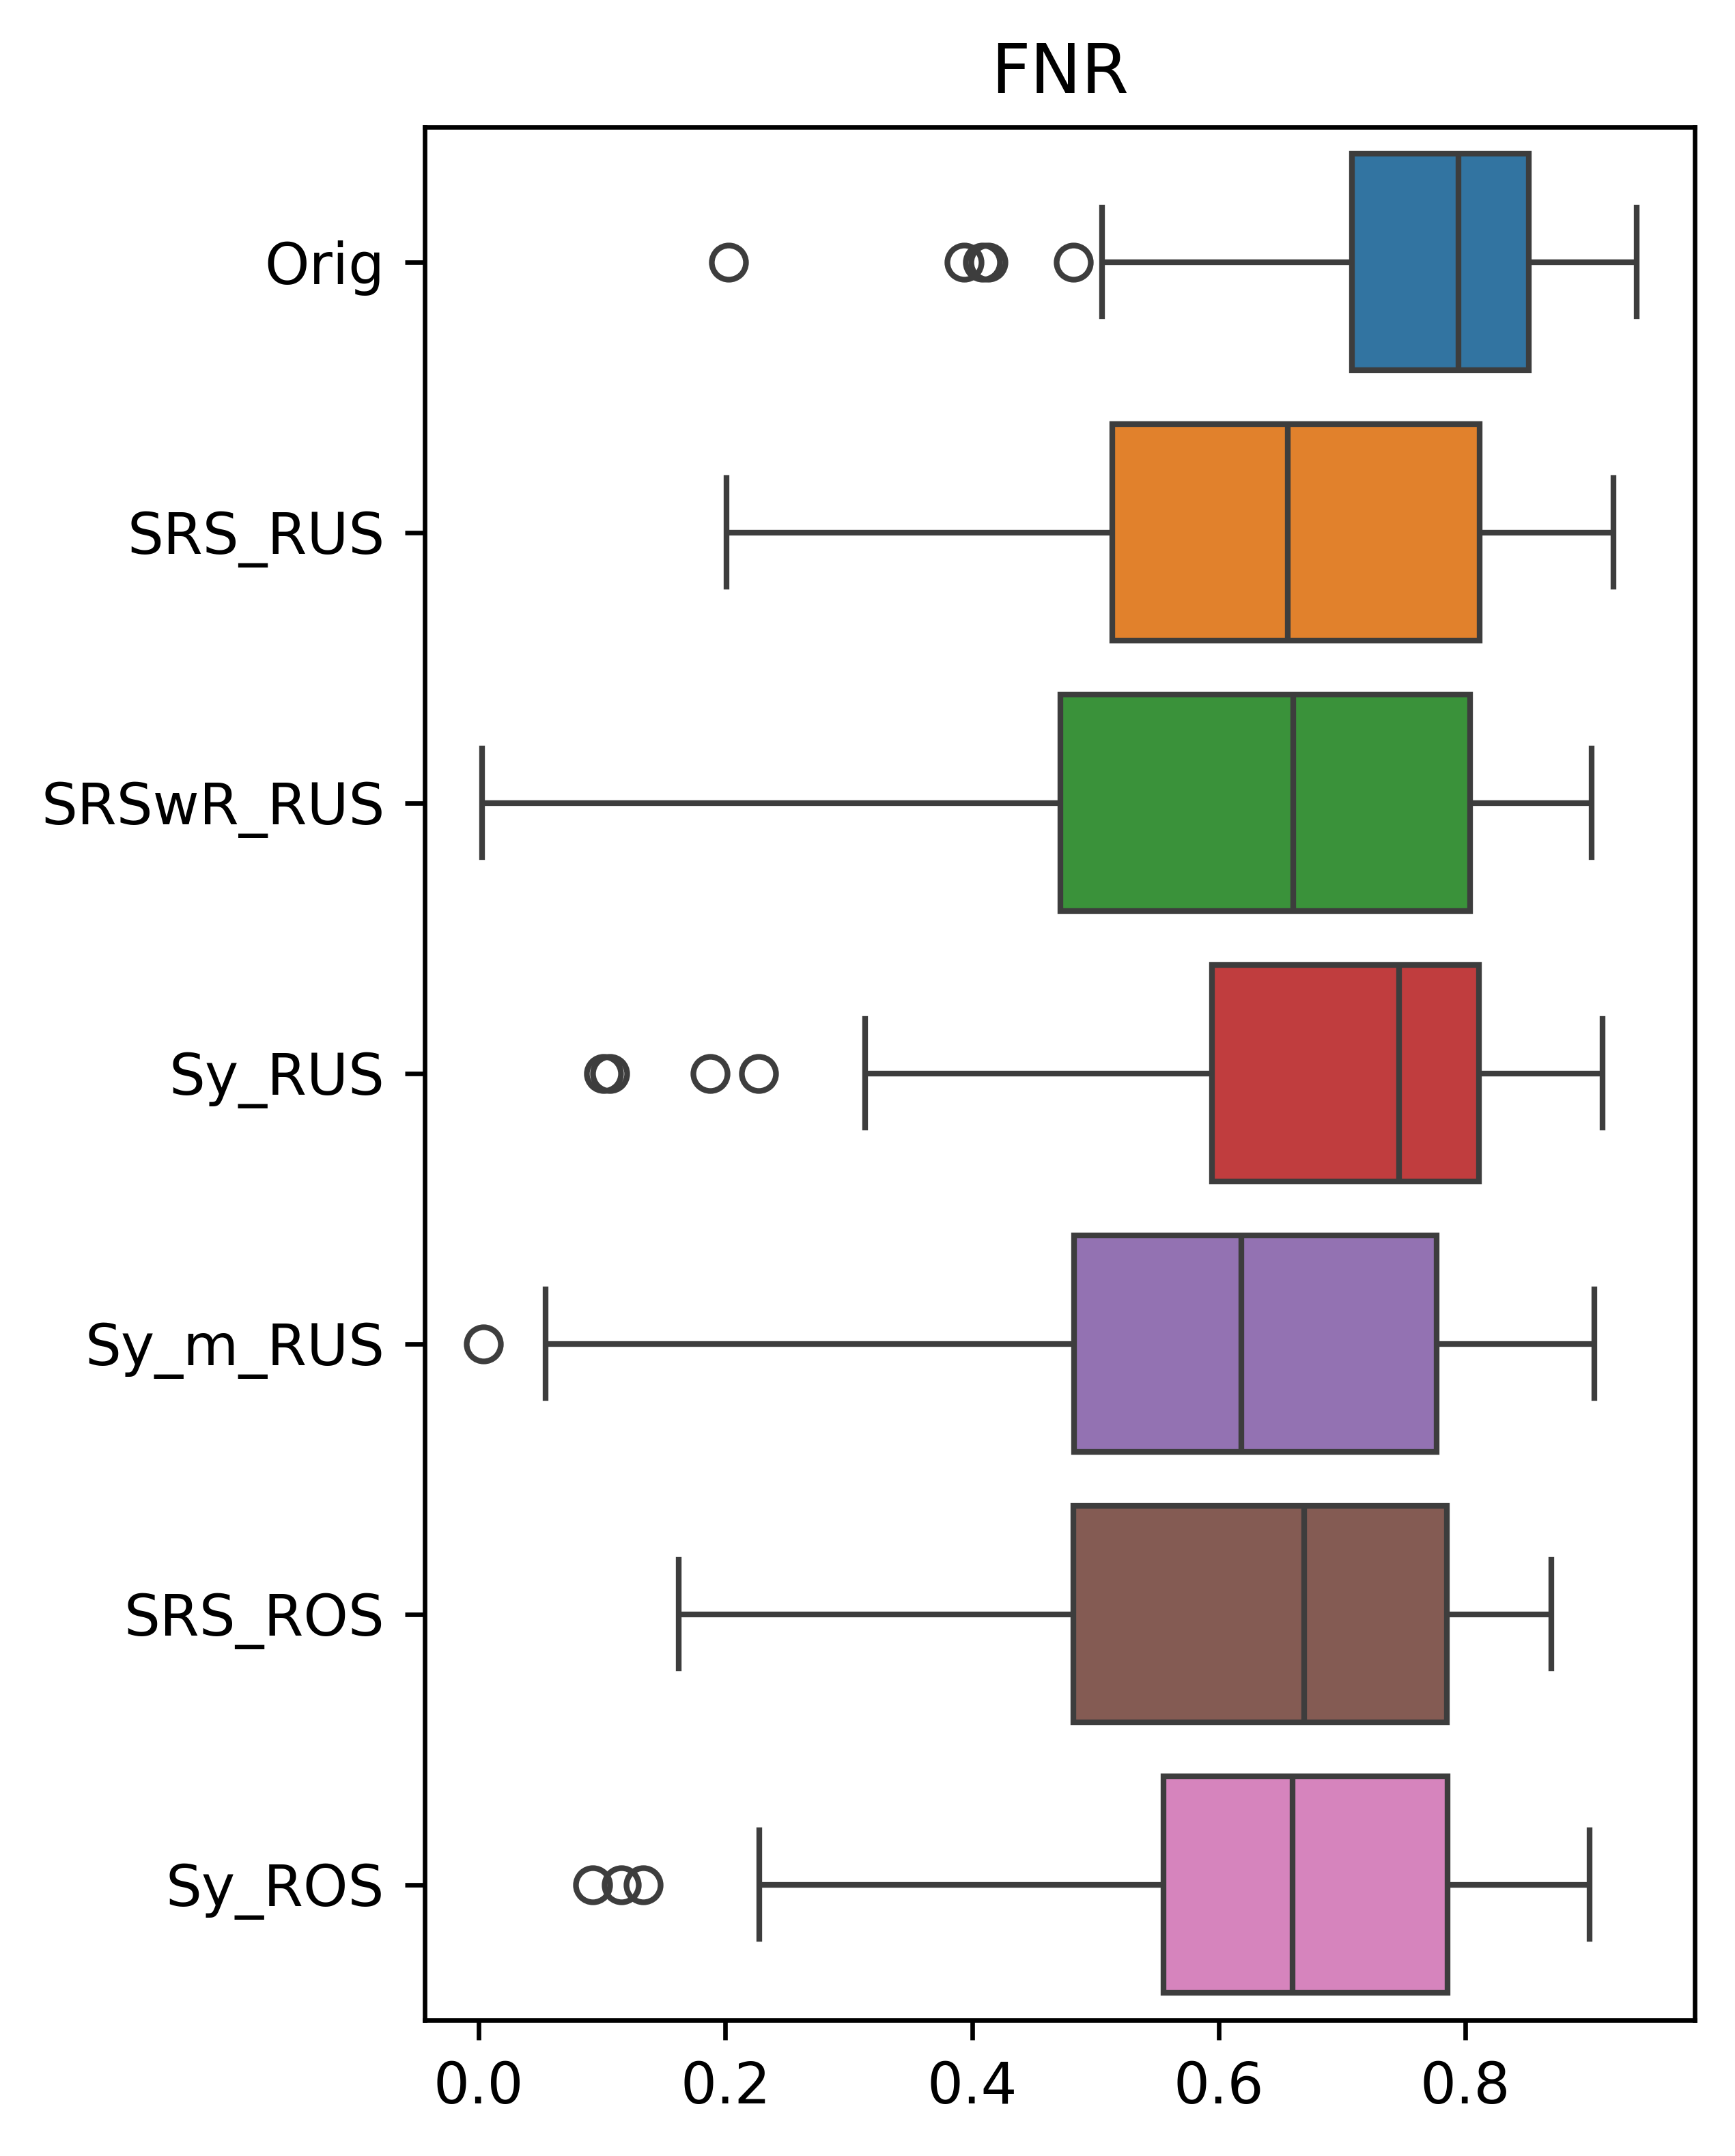

In [32]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [33]:
Time = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_time
DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time

<Axes: title={'center': 'Training Time'}>

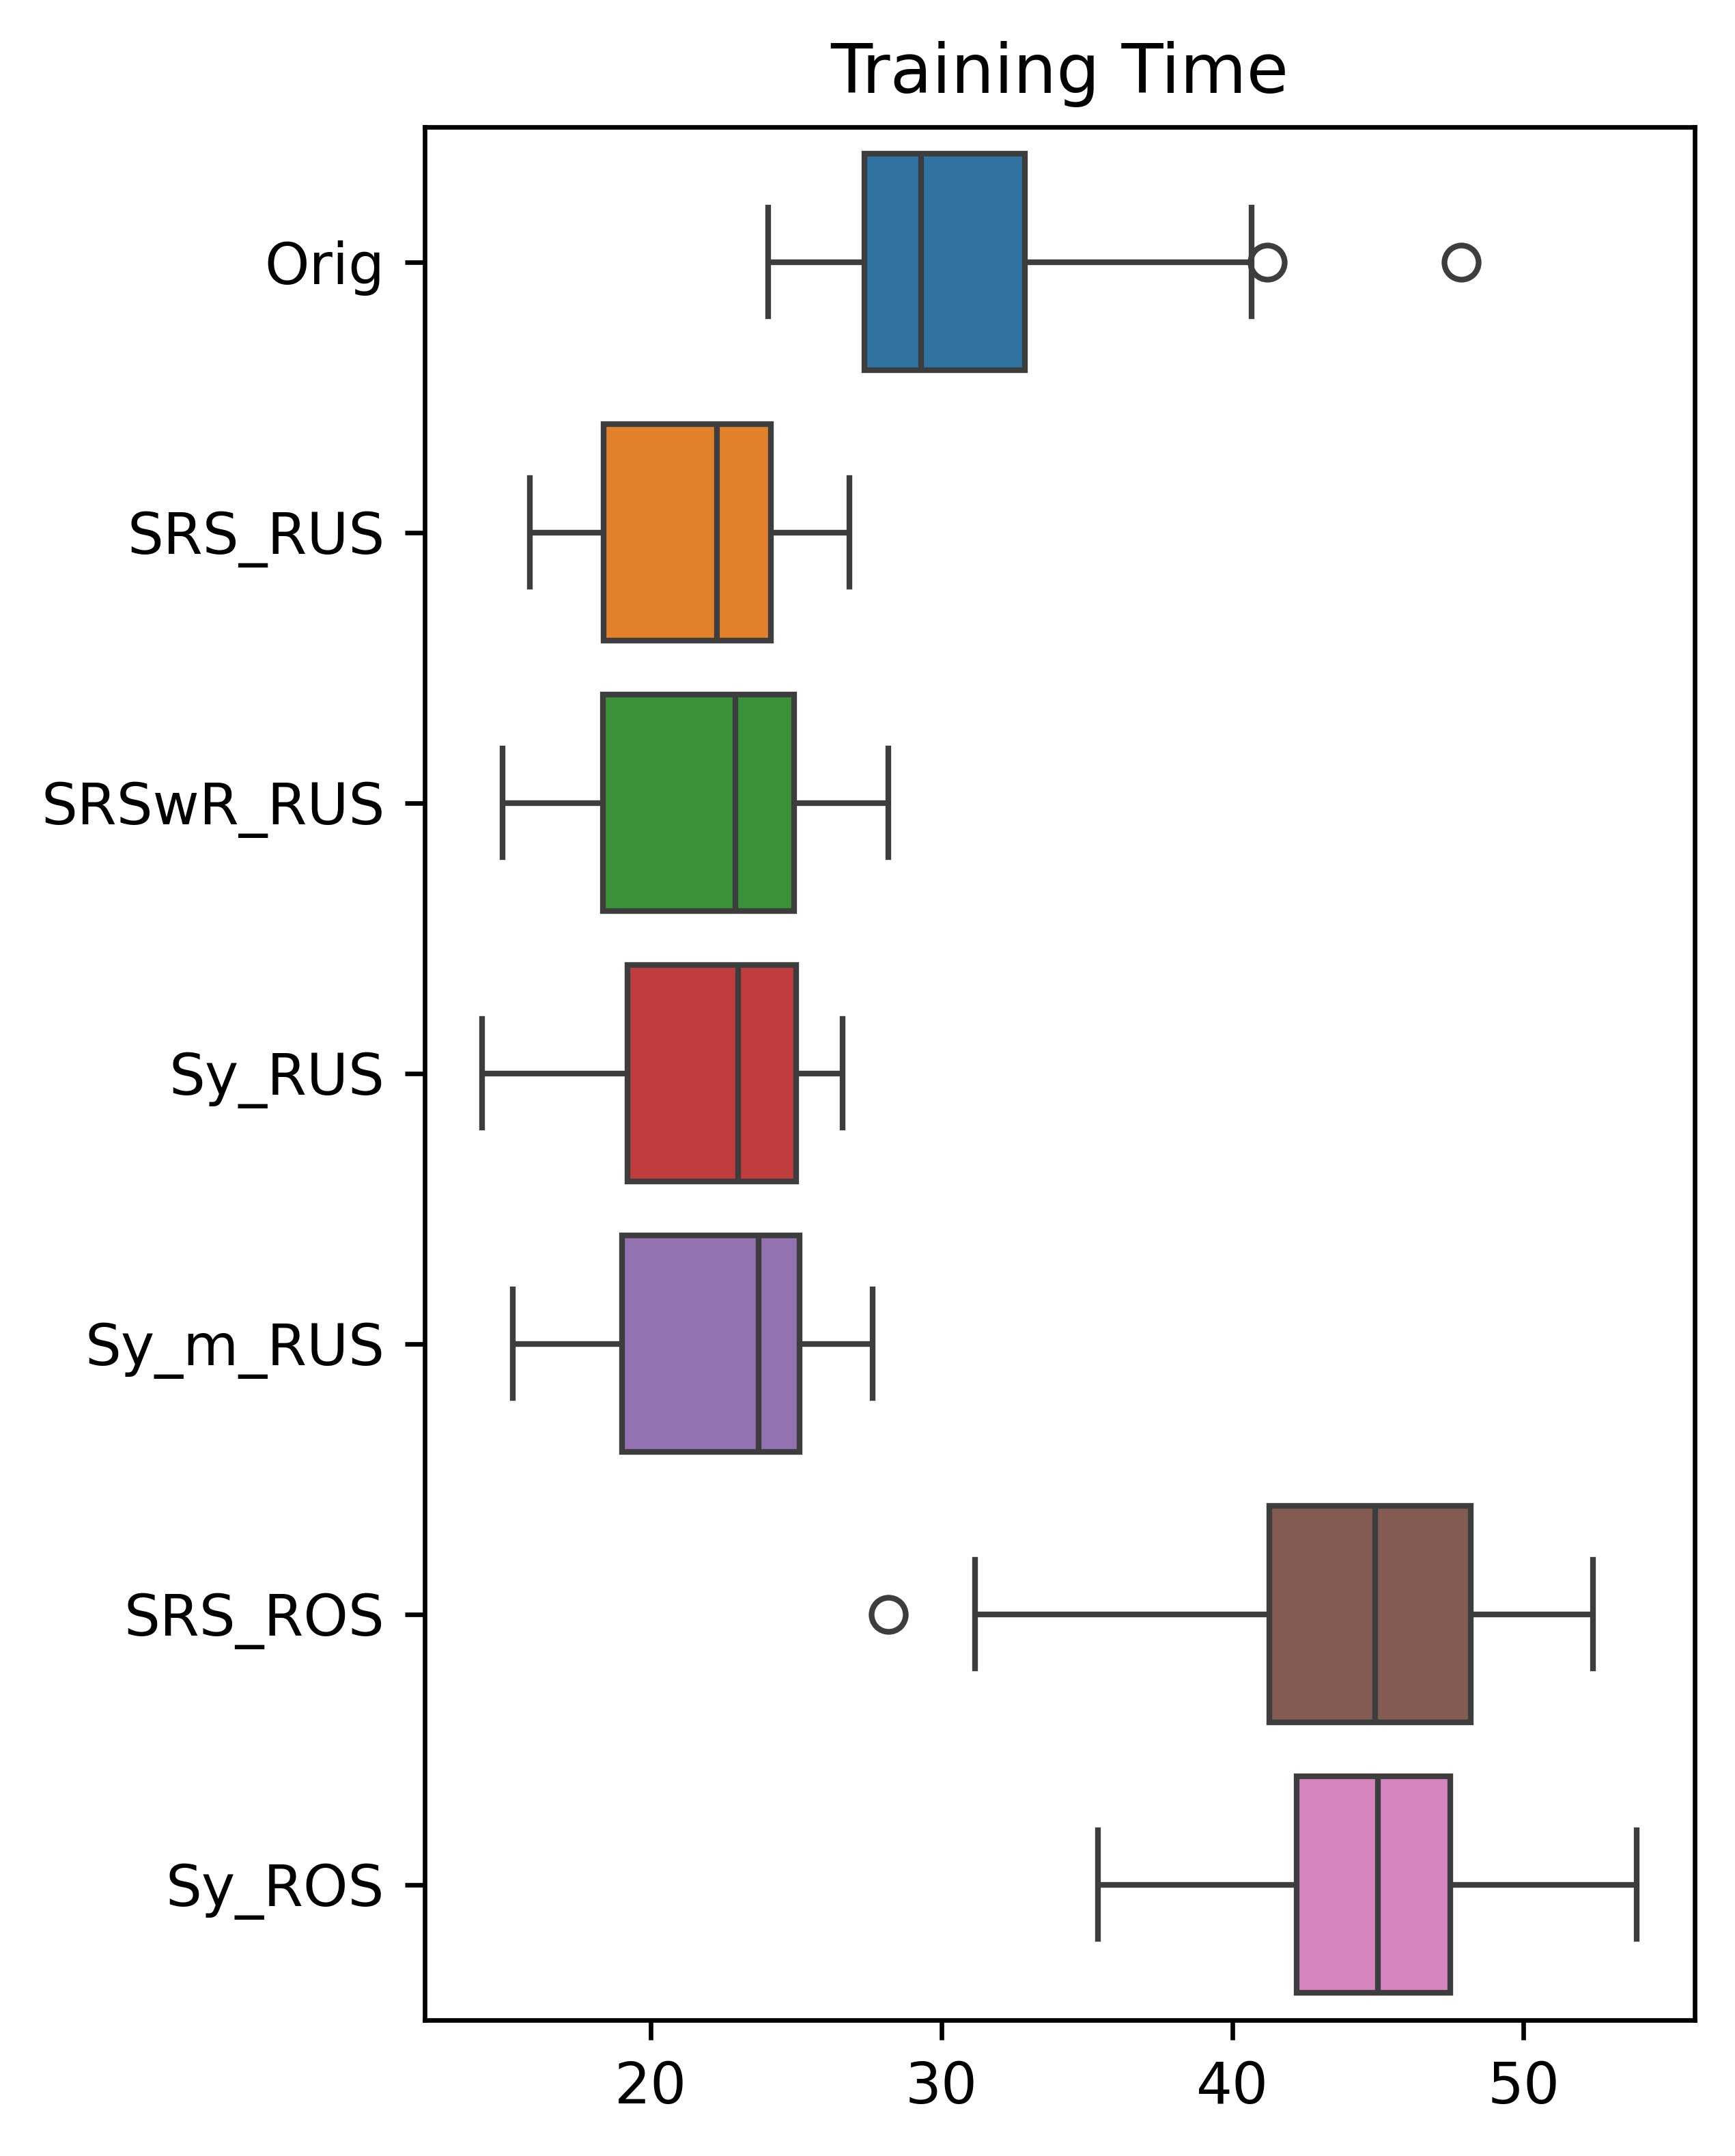

In [34]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')